<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,42.923303,35.112571,26.657083,87.264498,0.105620,202.063075,201.960970,0.102105
1,0.0,1.0,63.984001,80.154199,21.358757,50.300953,-0.003432,225.794479,225.822227,-0.027748
2,0.0,2.0,95.666100,63.203138,30.955611,29.093113,0.036872,228.954835,228.932325,0.022509
3,0.0,3.0,30.953217,79.750331,75.873794,45.573722,0.043568,242.194632,242.156049,0.038583
4,0.0,4.0,53.401695,50.377463,56.323093,80.008288,-0.169697,249.940842,250.124077,-0.183234
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,20.281212,34.727394,91.101405,30.052006,-0.015228,186.146789,186.185964,-0.039175
59996,999.0,56.0,56.151628,81.523471,95.092171,76.967683,0.008824,319.743777,319.735030,0.008747
59997,999.0,57.0,95.038426,46.209374,94.951233,48.391396,0.004342,294.594771,294.611267,-0.016496
59998,999.0,58.0,45.061694,62.201560,47.620707,42.286371,-0.024155,207.146178,207.154196,-0.008018


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,42.923303,35.112571,26.657083,87.264498,0.105620,202.063075,201.960970,0.102105
1,0.0,1.0,63.984001,80.154199,21.358757,50.300953,-0.003432,225.794479,225.822227,-0.027748
2,0.0,2.0,95.666100,63.203138,30.955611,29.093113,0.036872,228.954835,228.932325,0.022509
3,0.0,3.0,30.953217,79.750331,75.873794,45.573722,0.043568,242.194632,242.156049,0.038583
4,0.0,4.0,53.401695,50.377463,56.323093,80.008288,-0.169697,249.940842,250.124077,-0.183234
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,20.281212,34.727394,91.101405,30.052006,-0.015228,186.146789,186.185964,-0.039175
59996,999.0,56.0,56.151628,81.523471,95.092171,76.967683,0.008824,319.743777,319.735030,0.008747
59997,999.0,57.0,95.038426,46.209374,94.951233,48.391396,0.004342,294.594771,294.611267,-0.016496
59998,999.0,58.0,45.061694,62.201560,47.620707,42.286371,-0.024155,207.146178,207.154196,-0.008018


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    42.923303  35.112571  26.657083  87.264498  0.105620  202.063075   
      1.0    63.984001  80.154199  21.358757  50.300953 -0.003432  225.794479   
      2.0    95.666100  63.203138  30.955611  29.093113  0.036872  228.954835   
      3.0    30.953217  79.750331  75.873794  45.573722  0.043568  242.194632   
      4.0    53.401695  50.377463  56.323093  80.008288 -0.169697  249.940842   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   20.281212  34.727394  91.101405  30.052006 -0.015228  186.146789   
      56.0   56.151628  81.523471  95.092171  76.967683  0.008824  319.743777   
      57.0   95.038426  46.209374  94.951233  48.391396  0.004342  294.594771   
      58.0   45.061694  62.201560  47.620707  42.286371 -0.024155  207.146178   
      59.0   32.906581  26.954480  57.469387  55.556487  0.118825  183.005759   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    201.960970  0.102105  
      1.0    225.822227 -0.027748  
      2.0    228.932325  0.022509  
      3.0    242.156049  0.038583  
      4.0    250.124077 -0.183234  
...                 ...       ...  
999.0 55.0   186.185964 -0.039175  
      56.0   319.735030  0.008747  
      57.0   294.611267 -0.016496  
      58.0   207.154196 -0.008018  
      59.0   182.912827  0.092932  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    42.923303  35.112571  26.657083  87.264498  0.105620  202.063075   
      1.0    63.984001  80.154199  21.358757  50.300953 -0.003432  225.794479   
      2.0    95.666100  63.203138  30.955611  29.093113  0.036872  228.954835   
      3.0    30.953217  79.750331  75.873794  45.573722  0.043568  242.194632   
      4.0    53.401695  50.377463  56.323093  80.008288 -0.169697  249.940842   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   20.281212  34.727394  91.101405  30.052006 -0.015228  186.146789   
      56.0   56.151628  81.523471  95.092171  76.967683  0.008824  319.743777   
      57.0   95.038426  46.209374  94.951233  48.391396  0.004342  294.594771   
      58.0   45.061694  62.201560  47.620707  42.286371 -0.024155  207.146178   
      59.0   32.906581  26.954480  57.469387  55.556487  0.118825  183.005759   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    201.960970  0.102105  
      1.0    225.822227 -0.027748  
      2.0    228.932325  0.022509  
      3.0    242.156049  0.038583  
      4.0    250.124077 -0.183234  
...                 ...       ...  
999.0 55.0   186.185964 -0.039175  
      56.0   319.735030  0.008747  
      57.0   294.611267 -0.016496  
      58.0   207.154196 -0.008018  
      59.0   182.912827  0.092932  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,42.923303,35.112571,26.657083,87.264498,0.105620,202.063075,201.960970,0.102105
1,0.0,1.0,63.984001,80.154199,21.358757,50.300953,-0.003432,225.794479,225.822227,-0.027748
2,0.0,2.0,95.666100,63.203138,30.955611,29.093113,0.036872,228.954835,228.932325,0.022509
3,0.0,3.0,30.953217,79.750331,75.873794,45.573722,0.043568,242.194632,242.156049,0.038583
4,0.0,4.0,53.401695,50.377463,56.323093,80.008288,-0.169697,249.940842,250.124077,-0.183234
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,20.281212,34.727394,91.101405,30.052006,-0.015228,186.146789,186.185964,-0.039175
59996,999.0,56.0,56.151628,81.523471,95.092171,76.967683,0.008824,319.743777,319.735030,0.008747
59997,999.0,57.0,95.038426,46.209374,94.951233,48.391396,0.004342,294.594771,294.611267,-0.016496
59998,999.0,58.0,45.061694,62.201560,47.620707,42.286371,-0.024155,207.146178,207.154196,-0.008018


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    42.923303  35.112571  26.657083  87.264498  0.105620  202.063075   
      1.0    63.984001  80.154199  21.358757  50.300953 -0.003432  225.794479   
      2.0    95.666100  63.203138  30.955611  29.093113  0.036872  228.954835   
      3.0    30.953217  79.750331  75.873794  45.573722  0.043568  242.194632   
      4.0    53.401695  50.377463  56.323093  80.008288 -0.169697  249.940842   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   20.281212  34.727394  91.101405  30.052006 -0.015228  186.146789   
      56.0   56.151628  81.523471  95.092171  76.967683  0.008824  319.743777   
      57.0   95.038426  46.209374  94.951233  48.391396  0.004342  294.594771   
      58.0   45.061694  62.201560  47.620707  42.286371 -0.024155  207.146178   
      59.0   32.906581  26.954480  57.469387  55.556487  0.118825  183.005759   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    201.960970  0.102105  
      1.0    225.822227 -0.027748  
      2.0    228.932325  0.022509  
      3.0    242.156049  0.038583  
      4.0    250.124077 -0.183234  
...                 ...       ...  
999.0 55.0   186.185964 -0.039175  
      56.0   319.735030  0.008747  
      57.0   294.611267 -0.016496  
      58.0   207.154196 -0.008018  
      59.0   182.912827  0.092932  

[60000 rows x 8 columns]

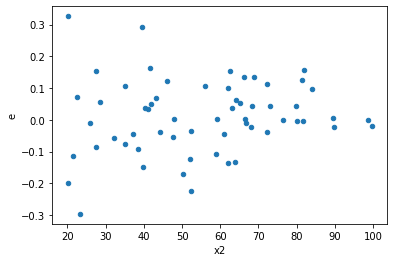

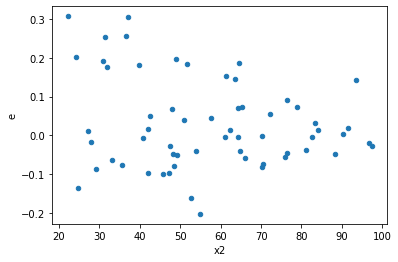

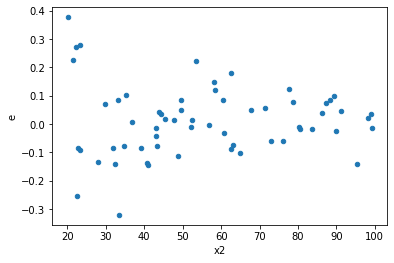

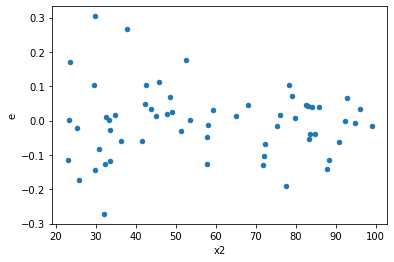

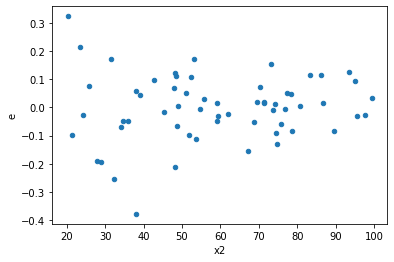

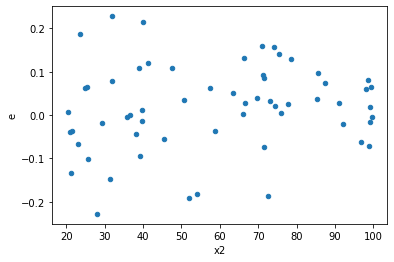

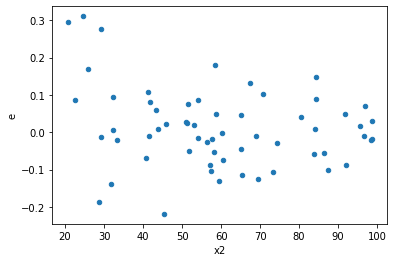

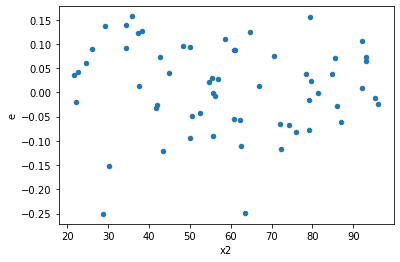

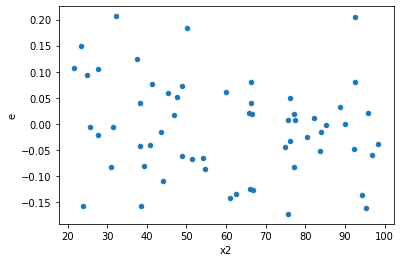

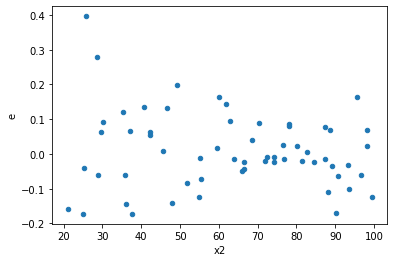

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,20.0,20.0,0.2308432554531997,0.2917680201388324,0.011542162772659985,0.01458840100694162,1.2639226542097712,0.6054025498060458,0.6972987250969771,0.3027012749030229,Reject001=1 : Homoscedasticity
6.0,20.0,20.0,0.126661565591371,0.2557952636970421,0.00633307827956855,0.012789763184852105,2.019517621645982,0.1243476978494431,0.9378261510752784,0.06217384892472155,Reject001=1 : Homoscedasticity
8.0,20.0,20.0,0.13969684681635838,0.20046443261770444,0.006984842340817919,0.010023221630885221,1.4349961161344569,0.42636269467931975,0.7868186526603401,0.21318134733965988,Reject001=1 : Homoscedasticity
12.0,20.0,20.0,0.09595131163344436,0.11172603746230052,0.004797565581672218,0.005586301873115026,1.1644034412902988,0.7368985187879704,0.6315507406060148,0.3684492593939852,Reject001=1 : Homoscedasticity
19.0,20.0,20.0,0.19084764125025272,0.20964192879052132,0.009542382062512636,0.010482096439526066,1.0984779660735982,0.8357143285148774,0.5821428357425613,0.4178571642574387,Reject001=1 : Homoscedasticity
33.0,20.0,20.0,0.08513260732381984,0.19462600355038193,0.004256630366190992,0.009731300177519097,2.286151096137357,0.07166448756537513,0.9641677562173124,0.03583224378268757,Reject001=1 : Homoscedasticity
34.0,20.0,20.0,0.10885492937397225,0.11425800505919566,0.005442746468698612,0.005712900252959783,1.0496355628201375,0.9148114431809664,0.5425942784095168,0.4574057215904832,Reject001=1 : Homoscedasticity
38.0,20.0,20.0,0.1535728667737733,0.2859814085076656,0.0076786433386886645,0.014299070425383281,1.8621870810612795,0.1730936509393235,0.9134531745303383,0.08654682546966175,Reject001=1 : Homoscedasticity
39.0,20.0,20.0,0.15103028374826805,0.15117347666393888,0.007551514187413402,0.007558673833196944,1.0009481073074689,0.9983302555480589,0.5008348722259706,0.49916512777402944,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,0.2308432554531997,0.2917680201388324,0.011542162772659985,0.01458840100694162,1.2639226542097712,0.6054025498060458,Reject001=1 : Homoscedasticity
1.0,20.0,20.0,0.28607079402140045,0.23772620707941078,0.014303539701070022,0.01188631035397054,0.8310048143594376,0.6828972965963168,Reject001=1 : Homoscedasticity
2.0,20.0,20.0,0.5714095730989902,0.11585638138878449,0.02857047865494951,0.005792819069439225,0.2027554084550027,0.000774216081241822,Reject001=0 : Heteroscedasticity
3.0,20.0,20.0,0.1976030767613126,0.0818580739161149,0.00988015383806563,0.004092903695805745,0.4142550574503066,0.05532435440197734,Reject001=1 : Homoscedasticity
4.0,20.0,20.0,0.4532083377158472,0.13916979811978467,0.02266041688579236,0.006958489905989233,0.3070768706974703,0.011153809217516884,Reject001=1 : Homoscedasticity
5.0,20.0,20.0,0.2361551853602884,0.11238053643580721,0.01180775926801442,0.005619026821790361,0.4758757944033906,0.10483802043053356,Reject001=1 : Homoscedasticity
6.0,20.0,20.0,0.126661565591371,0.2557952636970421,0.00633307827956855,0.012789763184852105,2.019517621645982,0.1243476978494431,Reject001=1 : Homoscedasticity
7.0,20.0,20.0,0.18634057963598794,0.10840514713393738,0.009317028981799397,0.0054202573566968695,0.5817581299022702,0.23438621674999544,Reject001=1 : Homoscedasticity
8.0,20.0,20.0,0.13969684681635838,0.20046443261770444,0.006984842340817919,0.010023221630885221,1.4349961161344569,0.42636269467931975,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      909
Reject001=0 : Heteroscedasticity     91
Name: Result_test, dtype: int64